In [15]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_pipeline.spatial_operations as so
import data_pipeline.fetch_fcc_data as fetch_fcc
import data_pipeline.fetch_census_data as fetch_census
from IPython.display import display  # required to display full dataframe tables
import geopandas
import contexily as cx
plt.rcParams['figure.figsize'] = [12, 12] 

ModuleNotFoundError: No module named 'contexily'

In [43]:
pd.set_option('display.max_columns', None)

In [28]:
df_cities_csv = pd.read_csv("../data/broadband.csv",index_col=0,parse_dates=[0])
df_cities_csv

,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,f_computer,...,log_mhi,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap
geoid,,,,,,,,,,,,,,,,,,,,,
34005702808,2.143,2.143,1.000,1.000,0.000,0.000,1000.000,35.000,0.910,0.955,...,11.20,3353.0,1055.0,31.62,20.18,305.57,20.75,14.66,0.009,0.006
39153504200,3.286,2.457,1.000,1.000,0.000,0.000,940.000,35.000,0.634,0.807,...,10.04,1708.0,694.0,48.11,19.26,162.57,12.29,27.06,0.028,0.011
36071000502,2.857,2.776,1.939,1.939,0.939,0.939,940.000,828.265,0.508,0.806,...,10.77,3763.0,1204.0,33.07,23.37,267.28,76.41,12.45,0.009,0.006
6013370000,3.840,3.693,2.680,1.613,0.747,0.747,875.333,784.667,0.925,0.959,...,11.54,2850.0,1137.0,289.57,60.46,261.09,127.88,12.62,0.102,0.021
48113019204,2.714,2.590,1.638,1.619,0.619,0.619,977.143,632.381,0.890,0.966,...,11.19,10051.0,2718.0,320.81,127.74,246.56,108.10,17.63,0.032,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39113040406,2.683,2.260,1.163,1.000,0.000,0.000,940.000,35.000,0.963,0.989,...,11.70,6926.0,2711.0,1239.43,270.96,222.81,18.72,30.94,0.179,0.039
48245011303,2.109,1.703,0.125,0.016,0.000,0.000,51.062,9.609,0.770,0.860,...,11.24,3111.0,1149.0,211.03,55.35,105.60,146.35,66.37,0.068,0.018
1073012302,2.313,2.134,1.070,1.010,0.184,0.184,805.323,207.600,0.850,0.887,...,11.09,4026.0,1418.0,232.29,71.62,242.09,23.34,25.17,0.058,0.018


In [19]:
df_cities = geopandas.read_file("../data/broadband.geojson")
df_cities = df_cities.to_crs(epsg=3857)

In [70]:
df_cities

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,f_computer,f_ba,f_black,f_hispanic,mhi,log_mhi,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap,geometry
0,34005702808,2.143,2.143,1.000,1.000,0.000,0.000,1000.000,35.000,0.910,0.955,0.178,0.688,0.137,73194.0,11.20,3353.0,1055.0,31.62,20.18,305.57,20.75,14.66,0.009,0.006,"POLYGON ((-8338721.991 4870666.343, -8338382.4..."
1,39153504200,3.286,2.457,1.000,1.000,0.000,0.000,940.000,35.000,0.634,0.807,0.033,0.451,0.043,23036.0,10.04,1708.0,694.0,48.11,19.26,162.57,12.29,27.06,0.028,0.011,"POLYGON ((-9074549.502 5021131.869, -9074547.3..."
2,36071000502,2.857,2.776,1.939,1.939,0.939,0.939,940.000,828.265,0.508,0.806,0.114,0.219,0.643,47500.0,10.77,3763.0,1204.0,33.07,23.37,267.28,76.41,12.45,0.009,0.006,"POLYGON ((-8240120.233 5085305.101, -8240069.4..."
3,06013370000,3.840,3.693,2.680,1.613,0.747,0.747,875.333,784.667,0.925,0.959,0.389,0.149,0.195,102450.0,11.54,2850.0,1137.0,289.57,60.46,261.09,127.88,12.62,0.102,0.021,"POLYGON ((-13617376.377 4570250.737, -13617279..."
4,48113019204,2.714,2.590,1.638,1.619,0.619,0.619,977.143,632.381,0.890,0.966,0.270,0.114,0.581,72332.0,11.19,10051.0,2718.0,320.81,127.74,246.56,108.10,17.63,0.032,0.013,"POLYGON ((-10772278.627 3888211.000, -10772274..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72826,39113040406,2.683,2.260,1.163,1.000,0.000,0.000,940.000,35.000,0.963,0.989,0.626,0.052,0.020,120450.0,11.70,6926.0,2711.0,1239.43,270.96,222.81,18.72,30.94,0.179,0.039,"POLYGON ((-9374287.799 4806347.528, -9374187.2..."
72827,48245011303,2.109,1.703,0.125,0.016,0.000,0.000,51.062,9.609,0.770,0.860,0.187,0.047,0.203,76037.0,11.24,3111.0,1149.0,211.03,55.35,105.60,146.35,66.37,0.068,0.018,"POLYGON ((-10495595.098 3488144.266, -10493231..."
72828,01073012302,2.313,2.134,1.070,1.010,0.184,0.184,805.323,207.600,0.850,0.887,0.164,0.105,0.017,65833.0,11.09,4026.0,1418.0,232.29,71.62,242.09,23.34,25.17,0.058,0.018,"POLYGON ((-9702934.672 3960941.092, -9702813.0..."
72829,06081608023,4.633,4.500,1.833,1.333,0.400,0.400,908.000,448.000,0.954,0.969,0.642,0.027,0.075,174063.0,12.07,2598.0,864.0,253.75,73.06,301.00,76.61,12.91,0.098,0.028,"POLYGON ((-13612033.557 4515439.007, -13611690..."


In [21]:
# load 4 cities data
htx = geopandas.read_file("../neighborhood-data/houston/Houston/Houston.geojson")
htx = htx.to_crs(epsg=3857)

la = geopandas.read_file("../neighborhood-data/los-angeles/Los Angeles/Los Angeles.geojson")
la = la.to_crs(epsg=3857)

philly = geopandas.read_file("../neighborhood-data/philadelphia/Philadelphia/Neighborhoods_Philadelphia.shp")
philly = philly.to_crs(epsg=3857)

pho = geopandas.read_file('../neighborhood-data/phoenix/phoenix/Villages.geojson')
pho = pho.to_crs(epsg=3857)

In [23]:
htx_merged = geopandas.sjoin(htx, df_cities, how = "left")
la_merged = geopandas.sjoin(la, df_cities, how = "left")
philly_merged = geopandas.sjoin(philly, df_cities, how = "left")
pho_merged = geopandas.sjoin(pho, df_cities, how = "left")

Houston Visualization

In [44]:
htx_merged

,OBJECTID,PERIMETER,POLYID,SNBNAME,cohgis_COHGIS_SNBR_AREA,cohgis_COHGIS_SNBR_LEN,COUNCIL_ACTIVE,RECOGNITION_DATE,SnbrInfoURL,WeCan,Top10,CEA_FLAG,ShapeSTArea,ShapeSTLength,geometry,index_right,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,f_computer,f_ba,f_black,f_hispanic,mhi,log_mhi,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap
0,1,16572.025,60,FOURTH WARD,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/60...,Y,None,N,1.296982e+07,16572.026024,"POLYGON ((-10618300.023 3472939.776, -10618293...",17922,48201410500,4.367,4.266,2.789,2.094,0.953,0.953,992.773,954.648,0.969,0.993,0.693,0.030,0.182,93214.0,11.44,4560.0,2554.0,772.71,209.20,226.20,109.32,14.39,0.169,0.046
0,1,16572.025,60,FOURTH WARD,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/60...,Y,None,N,1.296982e+07,16572.026024,"POLYGON ((-10618300.023 3472939.776, -10618293...",1825,48201410200,4.364,4.164,2.473,1.909,0.818,0.782,906.291,787.118,0.963,0.985,0.787,0.018,0.190,133355.0,11.80,5576.0,3072.0,624.10,209.16,272.43,120.84,13.14,0.112,0.038
0,1,16572.025,60,FOURTH WARD,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/60...,Y,None,N,1.296982e+07,16572.026024,"POLYGON ((-10618300.023 3472939.776, -10618293...",2847,48201410100,3.913,3.722,2.139,1.687,0.548,0.548,942.330,562.622,0.820,0.927,0.645,0.291,0.237,58778.0,10.98,4811.0,2710.0,591.78,161.04,271.22,120.02,13.82,0.123,0.033
0,1,16572.025,60,FOURTH WARD,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/60...,Y,None,N,1.296982e+07,16572.026024,"POLYGON ((-10618300.023 3472939.776, -10618293...",43549,48201510100,3.443,2.990,2.062,1.845,0.866,0.856,979.629,860.015,0.902,0.966,0.719,0.115,0.264,133854.0,11.80,2344.0,1185.0,248.56,95.27,266.39,131.37,12.79,0.106,0.041
0,1,16572.025,60,FOURTH WARD,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/60...,Y,None,N,1.296982e+07,16572.026024,"POLYGON ((-10618300.023 3472939.776, -10618293...",70990,48201510200,3.828,3.503,1.981,1.535,0.580,0.573,895.172,585.701,0.929,0.956,0.680,0.063,0.351,95523.0,11.47,6627.0,3406.0,922.06,313.77,270.51,114.50,13.53,0.139,0.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,145251.999,9,ADDICKS PARK TEN,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/9....,None,None,N,6.532924e+08,145118.396462,"POLYGON ((-10653842.020 3476824.013, -10653845...",57365,48201540200,3.783,3.217,1.783,1.087,0.130,0.087,956.783,117.391,0.902,0.930,0.159,0.134,0.589,53567.0,10.89,2522.0,925.0,84.75,24.91,210.97,28.55,14.78,0.034,0.010
87,88,145251.999,9,ADDICKS PARK TEN,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/9....,None,None,N,6.532924e+08,145118.396462,"POLYGON ((-10653842.020 3476824.013, -10653845...",19071,48201541602,3.320,3.186,1.876,1.361,0.371,0.361,977.938,382.732,0.795,0.903,0.221,0.073,0.609,63500.0,11.06,10628.0,3122.0,436.23,162.87,252.93,86.36,19.47,0.041,0.015
87,88,145251.999,9,ADDICKS PARK TEN,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/9....,None,None,N,6.532924e+08,145118.396462,"POLYGON ((-10653842.020 3476824.013, -10653845...",34778,48201540502,3.636,3.523,2.114,1.500,0.500,0.500,1000.000,517.500,0.886,0.969,0.313,0.117,0.289,76641.0,11.25,4790.0,1735.0,217.75,89.41,271.87,116.44,12.90,0.045,0.019
87,88,145251.999,9,ADDICKS PARK TEN,0,0,None,NaT,http://www.houstontx.gov/superneighborhoods/9....,None,None,N,6.532924e+08,145118.396462,"POLYGON ((-10653842.020 3476824.013, -10653845...",71393,48201454400,1.880,1.520,1.160,1.080,0.160,0.160,920.480,186.600,0.987,1.000,0.644,0.525,0.137,44526.0,10.70,1186.0,461.0,279.46,122.34,224.21,99.63,14.52,0.236,0.103


In [ ]:
def df_clean(df):
    df['n_hshld_internet'] = df['f_broadband']*df['households']

    df['neighb_hshld_internet'] = df['n_hshld_internet'].groupby(df['name']).transform('sum')

    df['neighb_hshld_total'] = df['households'].groupby(df['name']).transform('sum')

    df['internet_access_rate'] = df['neighb_hshld_internet']/df['neighb_hshld_total']

    df_internet_equity = df[['name', 'geometry', 'internet_access_rate']]

    df_internet_equity = df_internet_equity.drop_duplicates()
    
    return df_internet_equity

In [58]:
htx_merged = htx_merged.rename(columns={'SNBNAME':'name'})

In [59]:
htx_internet_equity = df_clean(htx_merged)

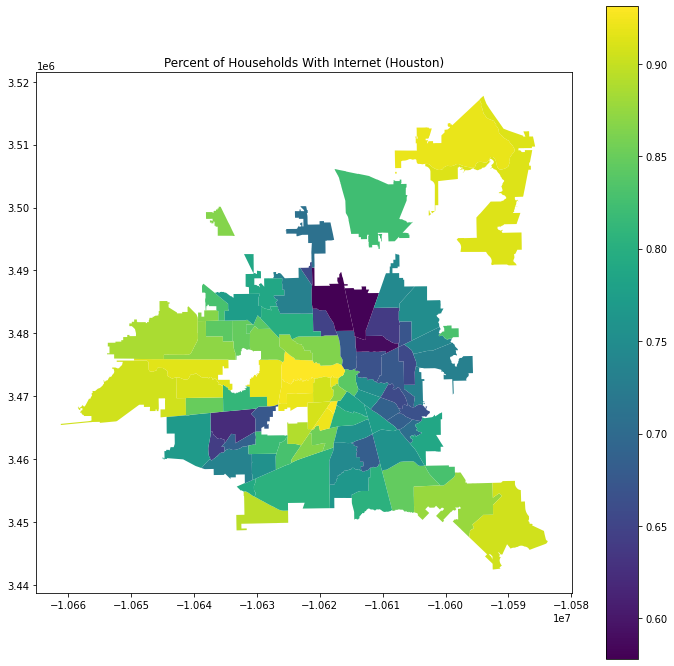

In [61]:
so.simple_map(htx_internet_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet (Houston)')

Los Angeles Visualization

In [45]:
la_merged

,external_i,name,location,latitude,slug_1,sqmi,display_na,set,slug,longitude,name_1,kind,type,geometry,index_right,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,f_computer,f_ba,f_black,f_hispanic,mhi,log_mhi,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap
0,acton,Acton,POINT(34.497355239240846 -118.16981019229348),-118.16981019229348,None,39.3391089485,Acton L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),acton,34.497355239240846,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-13158255.188 4101406.840, -13...",12868,06037910811,1.257,1.257,0.188,0.020,0.000,0.000,44.317,9.545,1.000,0.902,0.307,0.089,0.156,121771.0,11.71,179.0,41.0,44.79,10.50,15.78,4.40,546.41,0.250,0.059
0,acton,Acton,POINT(34.497355239240846 -118.16981019229348),-118.16981019229348,None,39.3391089485,Acton L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),acton,34.497355239240846,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-13158255.188 4101406.840, -13...",51612,06037910805,2.414,2.283,1.034,0.337,0.000,0.000,361.142,30.326,0.891,0.934,0.303,0.020,0.180,105263.0,11.56,4722.0,1554.0,399.24,110.11,171.69,12.65,66.79,0.085,0.023
0,acton,Acton,POINT(34.497355239240846 -118.16981019229348),-118.16981019229348,None,39.3391089485,Acton L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),acton,34.497355239240846,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-13158255.188 4101406.840, -13...",43543,06037910812,1.457,1.429,0.029,0.029,0.000,0.000,40.743,3.914,0.770,0.942,0.155,0.000,0.207,81563.0,11.31,363.0,139.0,12.60,6.50,43.50,9.54,368.66,0.035,0.018
0,acton,Acton,POINT(34.497355239240846 -118.16981019229348),-118.16981019229348,None,39.3391089485,Acton L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),acton,34.497355239240846,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-13158255.188 4101406.840, -13...",20881,06037910813,3.119,2.984,1.629,0.606,0.000,0.000,609.419,40.000,0.843,0.917,0.273,0.009,0.209,105703.0,11.57,4080.0,1265.0,314.90,86.26,136.41,14.40,46.57,0.077,0.021
0,acton,Acton,POINT(34.497355239240846 -118.16981019229348),-118.16981019229348,None,39.3391089485,Acton L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),acton,34.497355239240846,None,L.A. County Neighborhood (Current),unincorporated-area,"MULTIPOLYGON (((-13158255.188 4101406.840, -13...",57823,06037910804,2.543,2.416,1.082,0.204,0.000,0.000,263.929,43.431,0.940,0.991,0.237,0.011,0.293,97326.0,11.49,2964.0,1069.0,220.41,67.39,173.37,12.48,50.96,0.074,0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,woodland-hills,Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,None,14.768309648,Woodland Hills L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),woodland-hills,34.159408692550485,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13199785.431 4054103.999, -13...",43785,06037800101,2.603,2.295,1.974,1.000,0.000,0.000,940.000,39.872,0.933,0.940,0.603,0.048,0.037,142159.0,11.86,5738.0,1938.0,727.99,212.19,189.34,15.69,12.85,0.127,0.037
271,woodland-hills,Woodland Hills,POINT(34.159408692550485 -118.61521650000006),-118.61521650000006,None,14.768309648,Woodland Hills L.A. County Neighborhood (Current),L.A. County Neighborhoods (Current),woodland-hills,34.159408692550485,None,L.A. County Neighborhood (Current),segment-of-a-city,"MULTIPOLYGON (((-13199785.431 4054103.999, -13...",38253,06037139802,3.036,2.429,1.786,1.000,0.000,0.000,940.000,123.393,0.937,0.974,0.645,0.050,0.069,153523.0,11.94,4126.0,1393.0,542.42,166.62,180.04,20.19,14.92,0.131,0.040
271,woodland-hills,Woodland Hills,POINT(34

In [54]:
la_internete_equity = df_clean(la_merged)

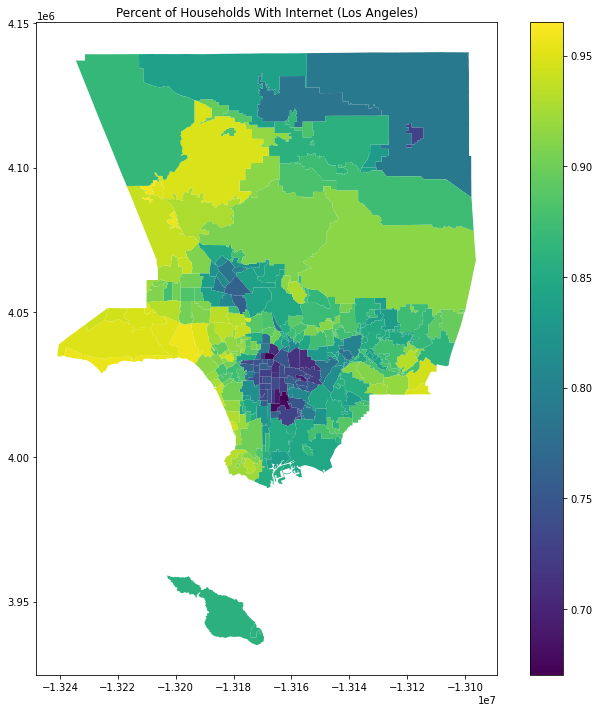

In [55]:
so.simple_map(la_internete_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet (Los Angeles)')

Philadelphia Visualization

In [62]:
philly_merged

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry,index_right,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,f_computer,f_ba,f_black,f_hispanic,mhi,log_mhi,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-8356501.632 4866727.272, -8356492.5...",18854,42101038100,2.366,1.648,1.479,1.169,0.732,0.732,835.592,435.831,0.676,0.771,0.124,0.295,0.224,32120.0,10.38,845.0,293.0,55.01,19.82,202.29,79.79,12.27,0.065,0.023
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-8356501.632 4866727.272, -8356492.5...",19604,42101018300,2.717,1.967,1.867,1.867,0.950,0.950,979.358,837.167,0.843,0.881,0.146,0.012,0.019,69188.0,11.14,4005.0,1539.0,60.34,27.39,292.82,103.74,15.78,0.015,0.007
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-8356501.632 4866727.272, -8356492.5...",19592,42101018400,2.644,1.844,1.822,1.822,0.889,0.889,954.844,784.622,0.777,0.880,0.172,0.000,0.058,54474.0,10.91,2242.0,840.0,64.03,15.84,236.33,99.84,11.81,0.029,0.007
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-8356501.632 4866727.272, -8356492.5...",55426,34005700104,2.276,1.328,0.966,0.966,0.000,0.000,965.690,33.793,0.744,0.878,0.224,0.391,0.103,58750.0,10.98,1846.0,637.0,20.88,10.75,246.79,19.04,14.75,0.011,0.006
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-8356501.632 4866727.272, -8356492.5...",64159,42101038000,2.821,1.974,1.897,1.897,1.000,1.000,993.846,880.000,0.840,0.894,0.107,0.095,0.387,40792.0,10.62,2431.0,781.0,14.23,8.81,203.69,72.29,11.78,0.006,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,EAST_PASSYUNK,East Passyunk,East Passyunk,10987.761846,6.502097e+06,"POLYGON ((-8366421.573 4855625.930, -8366451.9...",65497,42101004101,3.131,2.885,1.984,1.984,0.984,0.984,1000.000,866.148,0.790,0.853,0.236,0.198,0.217,34507.0,10.45,5637.0,2115.0,202.89,46.52,224.78,79.08,11.28,0.036,0.008
157,EAST_PASSYUNK,East Passyunk,East Passyunk,10987.761846,6.502097e+06,"POLYGON ((-8366421.573 4855625.930, -8366451.9...",15044,42101004001,3.000,2.780,1.900,1.900,0.920,0.920,998.800,812.400,0.805,0.853,0.311,0.036,0.204,55227.0,10.92,4165.0,1902.0,135.82,46.52,226.57,69.28,10.78,0.033,0.011
157,EAST_PASSYUNK,East Passyunk,East Passyunk,10987.761846,6.502097e+06,"POLYGON ((-8366421.573 4855625.930, -8366451.9...",13489,42101002801,3.162,2.514,1.946,1.946,0.946,0.946,1000.000,834.324,0.721,0.849,0.299,0.086,0.322,54340.0,10.90,4595.0,1556.0,156.87,37.13,225.35,100.26,9.29,0.034,0.008
157,EAST_PASSYUNK,East Passyunk,East Passyunk,10987.761846,6.502097e+06,"POLYGON ((-8366421.573 4855625.930, -8366451.9...",5543,42101002802,3.073,2.709,1.964,1.964,0.982,0.982,998.909,864.636,0.867,0.893,0.473,0.070,0.154,61075.0,11.02,5596.0,2209.0,244.52,57.94,221.63,95.26,9.69,0.044,0.010


In [63]:
philly_merged = philly_merged.rename(columns={'NAME':'name'})

In [64]:
philly_internete_equity = df_clean(philly_merged)

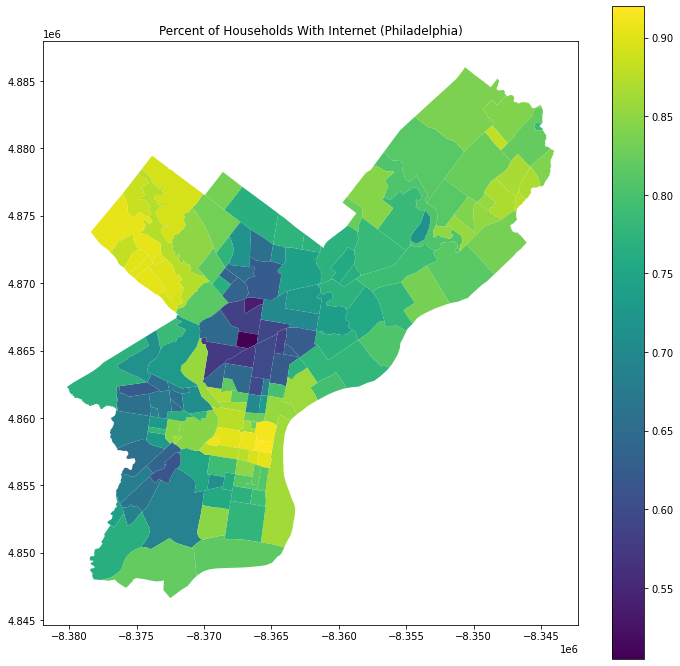

In [65]:
so.simple_map(philly_internete_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet (Philadelphia)')

Phoenix Visualization

In [66]:
pho_merged

,OBJECTID,NAME,ACRES,URL,INSERT_DATE,UPDATE_DATE,ANID,geometry,index_right,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,f_computer,f_ba,f_black,f_hispanic,mhi,log_mhi,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2445,"POLYGON ((-12464360.098 3943712.226, -12464511...",50454,04013116704,3.833,3.614,2.167,1.833,0.053,0.038,840.909,85.076,0.879,0.970,0.382,0.244,0.319,75580.0,11.23,9060.0,3476.0,688.87,227.06,191.68,18.94,11.42,0.076,0.025
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2445,"POLYGON ((-12464360.098 3943712.226, -12464511...",19698,04013320002,3.571,3.506,1.909,1.805,0.039,0.039,836.364,85.455,0.531,0.739,0.043,0.012,0.714,38125.0,10.55,6482.0,1762.0,160.50,51.52,192.33,41.83,15.65,0.025,0.008
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2445,"POLYGON ((-12464360.098 3943712.226, -12464511...",43336,04013116729,4.310,4.224,3.000,2.534,0.897,0.897,963.793,901.724,0.971,0.977,0.689,0.053,0.111,155694.0,11.96,4103.0,1479.0,394.52,125.97,188.34,85.33,11.12,0.096,0.031
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2445,"POLYGON ((-12464360.098 3943712.226, -12464511...",2974,04013116720,3.208,3.208,2.583,2.250,0.667,0.667,854.167,683.333,0.879,0.995,0.479,0.124,0.230,66589.0,11.11,4528.0,1783.0,177.49,64.86,221.29,82.54,28.97,0.039,0.014
0,16,Ahwatukee Foothills,22832.88,https://phoenix.gov/villages/Ahwatukee-Foothills,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2445,"POLYGON ((-12464360.098 3943712.226, -12464511...",11179,04013116718,3.190,3.095,2.286,1.810,0.190,0.190,833.333,116.667,0.880,0.906,0.357,0.198,0.225,63075.0,11.05,3057.0,1311.0,159.93,54.95,231.98,20.24,15.65,0.052,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,30,Rio Vista,26662.90,https://phoenix.gov/villages/Rio-Vista,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2431,"POLYGON ((-12492262.393 4002642.786, -12492147...",29568,04013610200,3.719,3.719,3.208,2.740,1.094,0.719,955.625,730.938,0.974,0.990,0.521,0.015,0.024,103686.0,11.55,7313.0,3244.0,1279.92,302.75,213.57,112.08,11.18,0.175,0.041
14,30,Rio Vista,26662.90,https://phoenix.gov/villages/Rio-Vista,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2431,"POLYGON ((-12492262.393 4002642.786, -12492147...",52842,04013610100,1.917,1.792,1.208,1.167,0.167,0.125,381.667,159.250,0.975,1.000,0.428,0.029,0.130,75417.0,11.23,630.0,242.0,147.90,41.24,160.05,52.23,17.95,0.235,0.065
14,30,Rio Vista,26662.90,https://phoenix.gov/villages/Rio-Vista,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2431,"POLYGON ((-12492262.393 4002642.786, -12492147...",28143,04013610000,1.729,1.685,1.280,1.157,0.050,0.047,418.720,89.517,0.966,0.987,0.296,0.056,0.156,81174.0,11.30,8147.0,2394.0,1024.64,281.73,113.12,18.29,23.76,0.126,0.035
14,30,Rio Vista,26662.90,https://phoenix.gov/villages/Rio-Vista,2022-05-05 09:44:59+00:00,2022-05-05 10:16:29+00:00,2431,"POLYGON ((-12492262.393 4002642.786, -12492147...",45818,04013611300,2.034,2.034,1.795,1.500,0.091,0.080,609.545,121.136,0.978,0.993,0.485,0.072,0.132,76381.0,11.24,6568.0,2609.0,852.83,257.75,195.40,71.45,12.81,0.130,0.039


In [67]:
pho_merged = pho_merged.rename(columns={'NAME':'name'})

In [68]:
pho_internete_equity = df_clean(pho_merged)

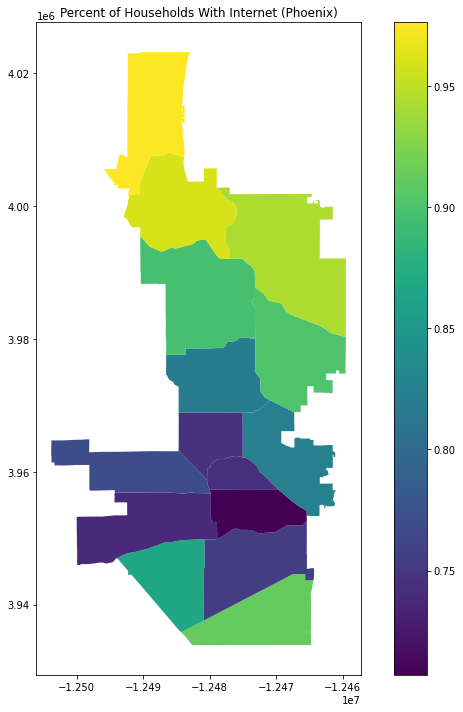

In [69]:
so.simple_map(pho_internete_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet (Phoenix)')